# EDA-Project 1

Это ваш первый проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"foreign_exchange_rates.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с подде, визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
rates = pd.read_csv("foreign_exchange_rates.csv")
rates1 = rates.copy()
rates1.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
rates1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

In [4]:
rates1['Year'] = rates1['Time Serie'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
rates1['Month'] = rates1['Time Serie'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').month)
rates1['Day'] = rates1['Time Serie'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').day)
rates1['Weekday'] = rates1['Time Serie'].apply(lambda x: datetime.strftime(datetime.strptime(x,'%Y-%m-%d'),'%A'))

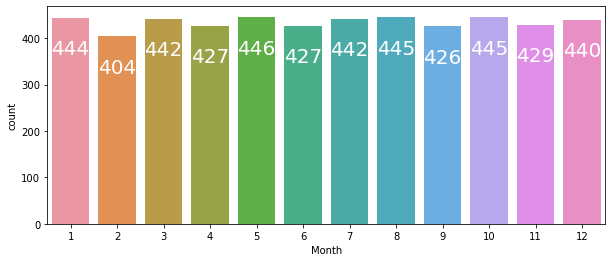

In [5]:
fig = plt.figure(figsize=(10,4))
ax=sns.countplot(x=rates1['Month'], data=rates1);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
#Data for month before removing ND values

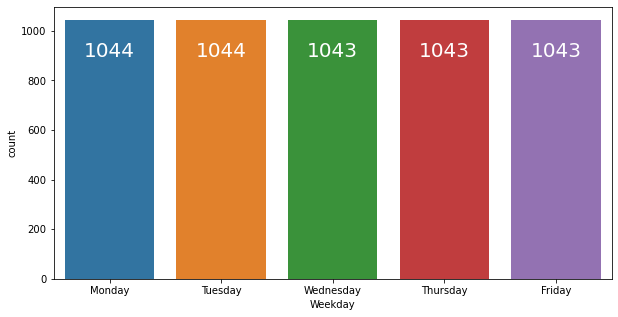

In [6]:
fig = plt.figure(figsize=(10,5))
ax=sns.countplot(x=rates1['Weekday'], data=rates1);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
#Data for weekdays before removing ND values

In [7]:
series = (rates1 == 'ND').any(axis=1) #Cleaning data from ND(NaN)
indexes = [x for x in range(0, len(series)) if series[x]==True]
print(len(indexes)) #Удаляем 202 строки с пустыми данными
rates1 = rates1.drop(indexes)


202


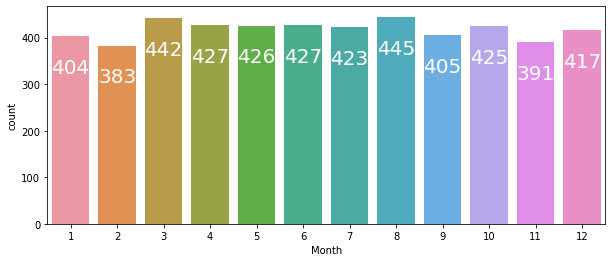

In [8]:
fig = plt.figure(figsize=(10,4))
ax=sns.countplot(x=rates1['Month'], data=rates1);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
#Data for month before removing ND values
#Видно, что за Январь и Ноябрь было около 40 пустых записей, а Февраль,Июль, Сентябрь и Декабрь около 20.
#Остальные месяца не имели пустых данных

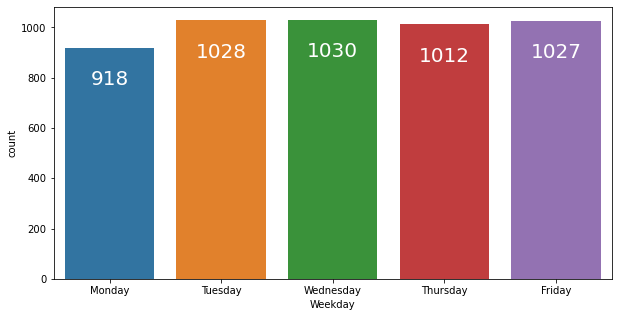

In [9]:
fig = plt.figure(figsize=(10,5))
ax=sns.countplot(x=rates1['Weekday'], data=rates1);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
#Data for weekdays after removing ND values
#Можно заметить что больше всего данных было пропущенно за Понедельник около 120 записей. 
#Остальные дни имели 10-30 пустых записей

In [10]:
rates1.drop('Unnamed: 0', axis=1) #changing order of columns and deleting excessive column
rates1 = rates1[['Time Serie',  'Year', 'Month', 'Day', 'Weekday','AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$']] 

In [11]:
#Изменяем тип данных с object на float для будущий вычислений
rates1[['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$']] = rates1[['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$']].astype(float)


,Time Serie,Year,Month,Day,Weekday,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,2000,1,3,Monday,1.5172,0.9847,1.9033,0.6146,1.8050,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,2000,1,4,Tuesday,1.5239,0.9700,1.9238,0.6109,1.8405,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,2000,1,5,Wednesday,1.5267,0.9676,1.9339,0.6092,1.8560,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,2000,1,6,Thursday,1.5291,0.9686,1.9436,0.6070,1.8400,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,2000,1,7,Friday,1.5272,0.9714,1.9380,0.6104,1.8310,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [12]:
years = [x for x in range(2000,2020)]  # creating lists for average price for 1$ in each country for every year. 

aus = []
euro = []
nzel = []
uk = [] 

braz = [] 
can = [] 
china = []
hkg = []

ind =[]
kor = []
mex = []
safr = []

sing = []
denm = []
jap = []
mal = []

nor = []
swed = []
sri = []
switz = []

taiw = []
tail = []


rates_aus = rates1[['Year','AUSTRALIA - AUSTRALIAN DOLLAR/US$']]
rates_euro = rates1[['Year','EURO AREA - EURO/US$']]
rates_nzel = rates1[['Year','NEW ZEALAND - NEW ZELAND DOLLAR/US$']]
rates_uk = rates1[['Year','UNITED KINGDOM - UNITED KINGDOM POUND/US$']]

rates_braz = rates1[['Year','BRAZIL - REAL/US$']]
rates_can = rates1[['Year','CANADA - CANADIAN DOLLAR/US$']]
rates_china = rates1[['Year','CHINA - YUAN/US$']]
rates_hkg = rates1[['Year','HONG KONG - HONG KONG DOLLAR/US$']]

rates_ind = rates1[['Year','INDIA - INDIAN RUPEE/US$']]
rates_kor = rates1[['Year','KOREA - WON/US$']]
rates_mex = rates1[['Year','MEXICO - MEXICAN PESO/US$']]
rates_safr = rates1[['Year','SOUTH AFRICA - RAND/US$']]

rates_sing = rates1[['Year','SINGAPORE - SINGAPORE DOLLAR/US$']]
rates_denm = rates1[['Year','DENMARK - DANISH KRONE/US$']]
rates_jap = rates1[['Year','JAPAN - YEN/US$']]
rates_mal = rates1[['Year','MALAYSIA - RINGGIT/US$']]

rates_nor = rates1[['Year','NORWAY - NORWEGIAN KRONE/US$']]
rates_swed = rates1[['Year','SWEDEN - KRONA/US$']]
rates_sri = rates1[['Year','SRI LANKA - SRI LANKAN RUPEE/US$']]
rates_switz = rates1[['Year','SWITZERLAND - FRANC/US$']]

rates_taiw = rates1[['Year','TAIWAN - NEW TAIWAN DOLLAR/US$']]
rates_tail = rates1[['Year','THAILAND - BAHT/US$']]


for i in range(2000,2020):  #В цикле вычисляем среднее значение за каждый год для каждой страны и записываем в отдельный список
    aus.append(rates_aus.iloc[:, 1][rates_aus['Year']==i].mean())
    euro.append(rates_euro.iloc[:, 1][rates_euro['Year']==i].mean())
    nzel.append(rates_nzel.iloc[:, 1][rates_nzel['Year']==i].mean())
    uk.append(rates_uk.iloc[:, 1][rates_uk['Year']==i].mean())
    
    braz.append(rates_braz.iloc[:, 1][rates_braz['Year']==i].mean())
    can.append(rates_can.iloc[:, 1][rates_can['Year']==i].mean())
    china.append(rates_china.iloc[:, 1][rates_china['Year']==i].mean())
    hkg.append(rates_hkg.iloc[:, 1][rates_hkg['Year']==i].mean())    
    
    ind.append(rates_ind.iloc[:, 1][rates_ind['Year']==i].mean())  
    kor.append(rates_kor.iloc[:, 1][rates_kor['Year']==i].mean())  
    mex.append(rates_mex.iloc[:, 1][rates_mex['Year']==i].mean())  
    safr.append(rates_safr.iloc[:, 1][rates_safr['Year']==i].mean())  
    
    sing.append(rates_sing.iloc[:, 1][rates_sing['Year']==i].mean())  
    denm.append(rates_denm.iloc[:, 1][rates_denm['Year']==i].mean())  
    jap.append(rates_jap.iloc[:, 1][rates_jap['Year']==i].mean())  
    mal.append(rates_mal.iloc[:, 1][rates_mal['Year']==i].mean()) 
    
    nor.append(rates_nor.iloc[:, 1][rates_nor['Year']==i].mean())  
    swed.append(rates_swed.iloc[:, 1][rates_swed['Year']==i].mean())  
    sri.append(rates_sri.iloc[:, 1][rates_sri['Year']==i].mean())  
    switz.append(rates_switz.iloc[:, 1][rates_switz['Year']==i].mean()) 
    
    taiw.append(rates_taiw.iloc[:, 1][rates_taiw['Year']==i].mean())  
    tail.append(rates_tail.iloc[:, 1][rates_tail['Year']==i].mean())
    
    

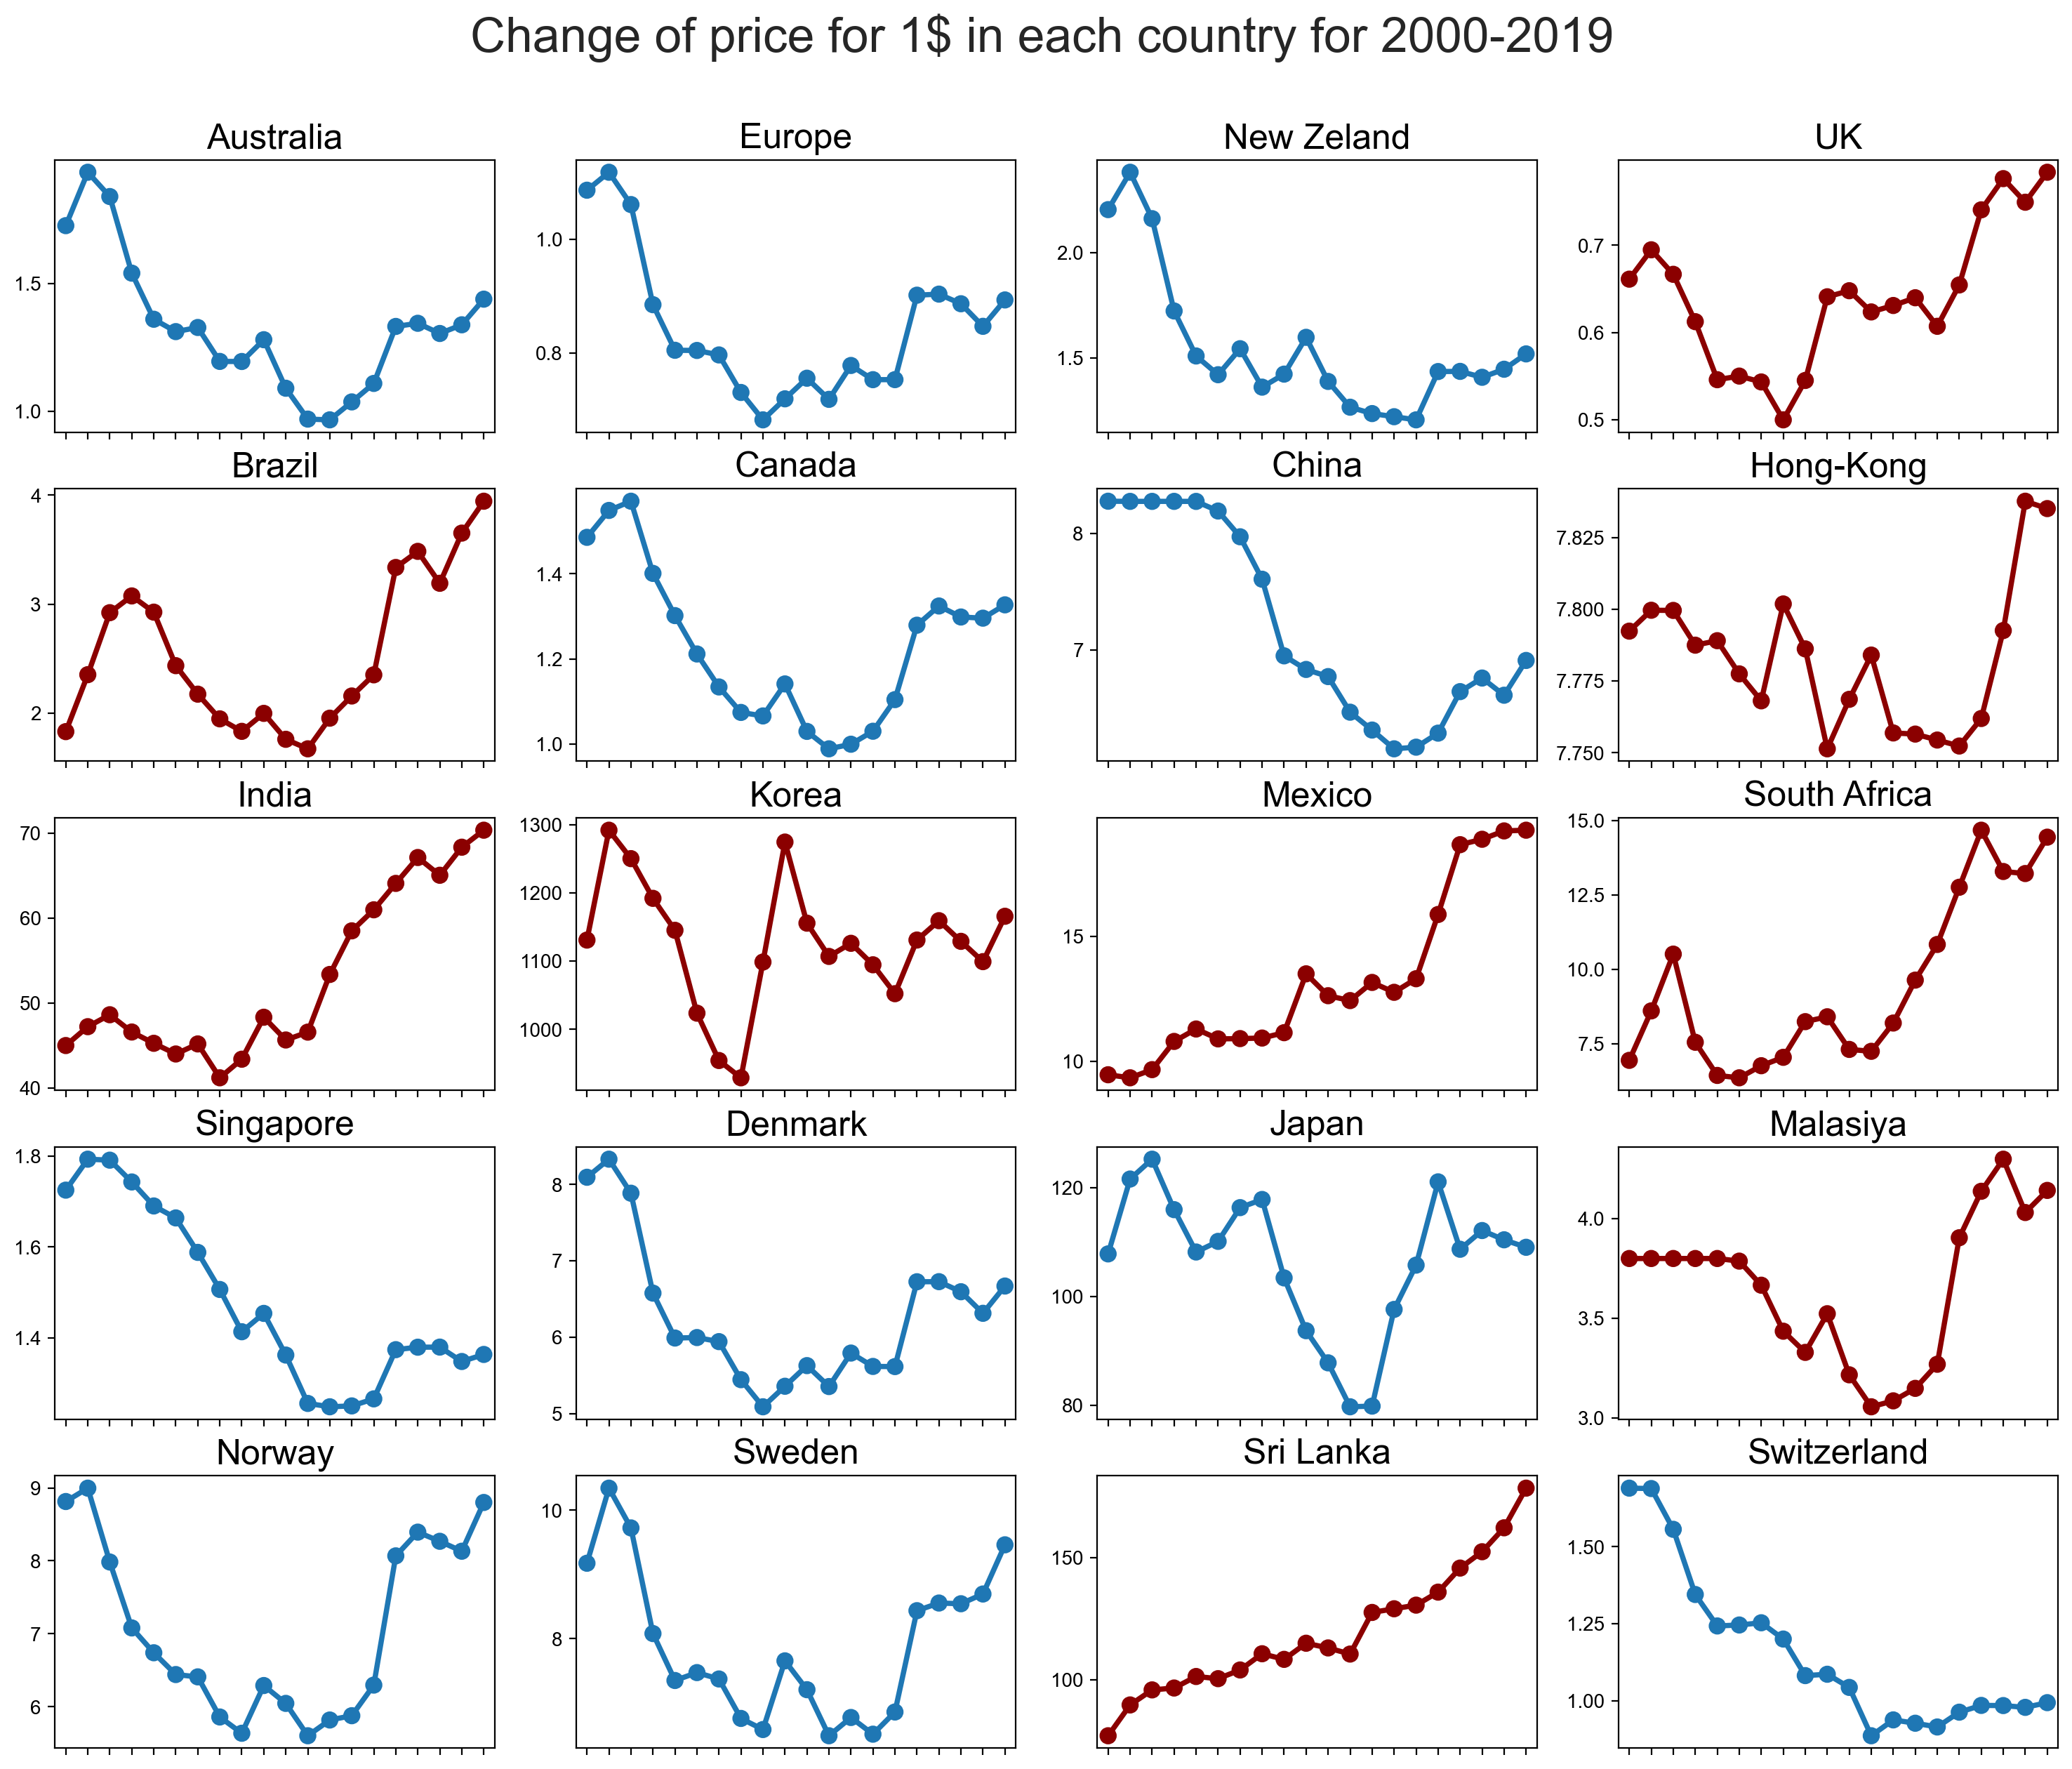

In [13]:
#Using pairplot to show changes on one big graph.
#Цвета: синий значит что курс национальной валюты либо не изменился либо вырос, красный значит что доллар вырос(нацвалюта упала)
#However 20/22 countries are available for this subplots. 2 Other are given in the next block

fig, ax = plt.subplots(5, 4, dpi=200, figsize=(15,13))  
fig.tight_layout()
sns.set_style("darkgrid",{"grid.color": "white"})
plt.rcParams['font.size'] = 15
fig.suptitle("Change of price for 1$ in each country for 2000-2019", fontsize=25)
fig.subplots_adjust(top=0.9)

sns.pointplot(ax=ax[0, 0], x=years, y=aus).set(title='Australia', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[0, 1], x=years, y=euro).set(title='Europe', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[0, 2], x=years, y=nzel).set(title='New Zeland', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[0, 3], x=years, y=uk, color='darkred').set(title='UK', xticklabels=[],xlabel=None)

sns.pointplot(ax=ax[1, 0], x=years, y=braz, color='darkred').set(title='Brazil', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[1, 1], x=years, y=can).set(title='Canada', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[1, 2], x=years, y=china).set(title='China', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[1, 3], x=years, y=hkg, color='darkred').set(title='Hong-Kong', xticklabels=[],xlabel=None)

sns.pointplot(ax=ax[2, 0], x=years, y=ind, color='darkred').set(title='India', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[2, 1], x=years, y=kor, color='darkred').set(title='Korea', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[2, 2], x=years, y=mex, color='darkred').set(title='Mexico', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[2, 3], x=years, y=safr, color='darkred').set(title='South Africa', xticklabels=[],xlabel=None)

sns.pointplot(ax=ax[3, 0], x=years, y=sing).set(title='Singapore', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[3, 1], x=years, y=denm).set(title='Denmark', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[3, 2], x=years, y=jap).set(title='Japan', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[3, 3], x=years, y=mal, color='darkred').set(title='Malasiya', xticklabels=[],xlabel=None)

sns.pointplot(ax=ax[4, 0], x=years, y=nor).set(title='Norway', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[4, 1], x=years, y=swed).set(title='Sweden', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[4, 2], x=years, y=sri, color='darkred').set(title='Sri Lanka', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[4, 3], x=years, y=switz).set(title='Switzerland', xticklabels=[],xlabel=None);


#На графиках видно что в ОСНОВНОМ развитые страны смогли повысить силу своей валюты по отношению к доллару. 
# В то время как в ОСНОВНОМ развивающиеся или страны 3 мира ухудшили свои позиции

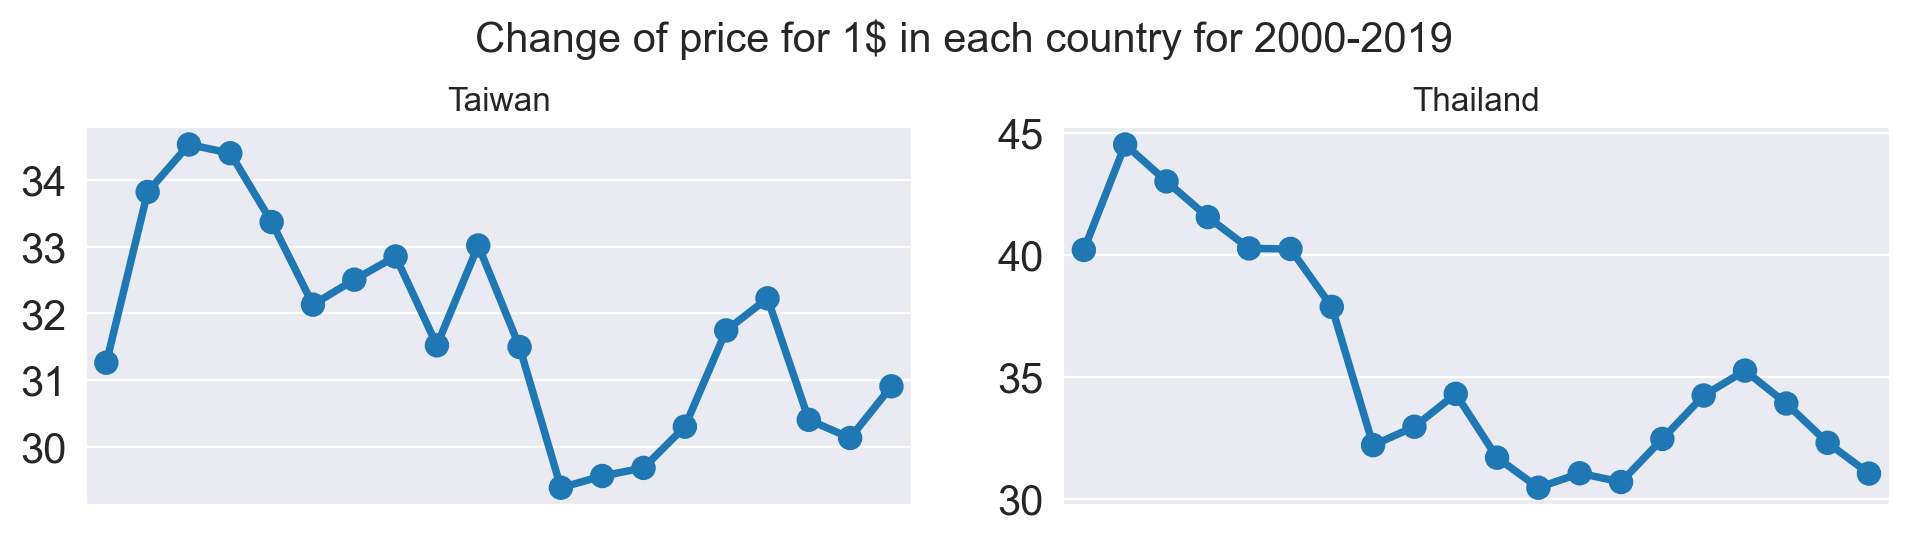

In [14]:
#2 графика которые не вместились в предыдущий
fig, ax = plt.subplots(1,2, dpi=200, figsize=(10,3))  
fig.tight_layout()
sns.set_style("darkgrid",{"grid.color": "white"})
plt.rcParams['font.size'] = 10
fig.suptitle("Change of price for 1$ in each country for 2000-2019", fontsize=15)
fig.subplots_adjust(top=0.8)

sns.pointplot(ax=ax[0], x=years, y=taiw).set(title='Taiwan', xticklabels=[],xlabel=None)
sns.pointplot(ax=ax[1], x=years, y=tail).set(title='Thailand', xticklabels=[],xlabel=None);